In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data_url = 'https://github.com/akashdeeps19/stacking-ensemble/blob/master/dataset_96.csv?raw=true'
data_96 = pd.read_csv(data_url)
data_96 = data_96.drop(columns='Unnamed: 0')
rf_url = 'https://github.com/akashdeeps19/stacking-ensemble/blob/master/RF_output_96.csv?raw=true'
rf_preds = pd.read_csv(rf_url, index_col=0)
ev_url = 'https://github.com/akashdeeps19/stacking-ensemble/blob/master/evoutput.csv?raw=true'
ev_preds = pd.read_csv(ev_url)
ann_url = 'https://github.com/akashdeeps19/stacking-ensemble/blob/master/ann_output_96.csv?raw=true'
ann_preds = pd.read_csv(ann_url, index_col=0)
lstm_url = 'https://github.com/akashdeeps19/stacking-ensemble/blob/master/LSTM_output_96.csv?raw=true'
lstm_preds = pd.read_csv(lstm_url, index_col=0)

In [ ]:
print(data_96.shape)
data_96.head()

(20739, 120)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
0,28667,28204,27781,27139,26687,26333,27611,27355,27166,26848,26485,26280,25908,25577,25239,24848,24595,24276,23817,23649,23382,23084,22628,22576,22198,22091,21945,21740,21420,21217,20975,20901,20592,20814,20707,20536,20460,20323,20148,20228,...,23240,23376,23510,23622,23694,23813,23734,23722,23447,23180,22997,22819,22575,22416,22366,22232,22291,22271,22303,22217,22340,22434,22653,22857,22855,23123,23390,23844,24749,25575,26365,27007,27504,27887,27906,28141,28329,28536,28786,28952
1,22198,22091,21945,21740,21420,21217,20975,20901,20592,20814,20707,20536,20460,20323,20148,20228,20023,19911,19555,19302,19122,19047,19138,19104,19113,19095,18986,18608,18348,18184,18170,18369,18506,18677,18902,19176,19388,19766,19964,20227,...,22855,23123,23390,23844,24749,25575,26365,27007,27504,27887,27906,28141,28329,28536,28786,28952,28978,29330,29546,29658,30146,30451,30398,30566,30711,30590,30722,30581,30329,30134,30023,29623,29428,29368,29593,30310,30447,30111,29755,29401
2,19113,19095,18986,18608,18348,18184,18170,18369,18506,18677,18902,19176,19388,19766,19964,20227,20456,20756,21105,21251,21177,21410,21634,21843,21984,22228,22407,22517,22592,22843,23049,23108,23240,23376,23510,23622,23694,23813,23734,23722,...,30711,30590,30722,30581,30329,30134,30023,29623,29428,29368,29593,30310,30447,30111,29755,29401,28667,28204,27781,27139,26687,26333,25834,25145,25124,24825,24512,24284,23819,23667,23410,23250,23017,22891,22789,22514,22480,22292,22308,22202
3,21984,22228,22407,22517,22592,22843,23049,23108,23240,23376,23510,23622,23694,23813,23734,23722,23447,23180,22997,22819,22575,22416,22366,22232,22291,22271,22303,22217,22340,22434,22653,22857,22855,23123,23390,23844,24749,25575,26365,27007,...,25124,24825,24512,24284,23819,23667,23410,23250,23017,22891,22789,22514,22480,22292,22308,22202,22176,22166,21877,21877,21921,21656,21931,22094,21982,22140,22283,22477,23000,24043,24426,24872,25374,25756,26260,27177,27518,27902,28490,29191
4,22291,22271,22303,22217,22340,22434,22653,22857,22855,23123,23390,23844,24749,25575,26365,27007,27504,27887,27906,28141,28329,28536,28786,28952,28978,29330,29546,29658,30146,30451,30398,30566,30711,30590,30722,30581,30329,30134,30023,29623,...,21982,22140,22283,22477,23000,24043,24426,24872,25374,25756,26260,27177,27518,27902,28490,29191,29358,31027,31593,31469,31660,32221,32357,33081,33357,33699,34032,34746,34958,35447,35516,35654,35586,36191,35740,36005,36042,35963,36287,36063


In [ ]:
print(rf_preds.shape)
rf_preds.head()

(20739, 24)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,22238.612509,22217.977091,22345.184451,22549.920285,22577.791772,22736.859775,23107.562072,23609.451046,24244.828693,24305.389568,24520.737874,24270.059832,24160.953248,23190.391851,23123.096879,23405.848116,23483.542367,23554.707831,23740.426639,23806.278429,23935.752682,24170.406868,24125.968022,24786.628309
1,29094.055833,28930.262128,29119.410624,28895.448161,28810.638425,28843.353195,28744.745288,28774.920854,28549.527816,29078.477909,29157.604951,28878.131721,28738.760962,28299.812059,28360.681795,27866.726441,27762.807406,27773.273143,27685.104077,27928.631086,27798.509643,27926.938896,27326.386103,27861.748274
2,29197.837535,29064.955438,28999.693086,28809.019974,28590.531134,28326.801246,27808.999608,27720.227550,27397.031563,27566.141121,27363.162415,27306.628694,27538.260819,26316.217475,24617.846390,24245.593057,23721.653370,23330.346560,23428.790326,22996.644547,23050.830373,23729.102764,23990.693567,24035.743558
3,22218.305588,22153.292286,21906.419381,22003.534307,22027.274248,21902.323399,22006.358414,21789.583768,21792.353811,21830.876717,21848.113719,22042.229305,22025.989416,22468.191801,22579.302180,22732.884501,22868.085874,22819.921277,23744.908355,23886.641917,24704.813582,25252.091925,26508.416708,28909.576583
4,29574.046563,30533.796908,31035.626219,30896.078718,30871.953967,31464.343562,31620.586351,31961.970659,32276.969438,32694.610068,33139.897620,33307.868428,33578.480830,33751.320879,33771.954626,34262.702501,34340.497112,34210.823340,34286.549949,33795.301524,34146.461207,33766.249037,34088.352850,35424.670103


In [ ]:
print(ev_preds.shape)
ev_preds.head()

(20739, 24)


,pred,pred.1,pred.2,pred.3,pred.4,pred.5,pred.6,pred.7,pred.8,pred.9,pred.10,pred.11,pred.12,pred.13,pred.14,pred.15,pred.16,pred.17,pred.18,pred.19,pred.20,pred.21,pred.22,pred.23
0,22373.461672,22647.389908,22633.469388,23233.507599,21692.734093,23753.086420,22895.984615,21050.725676,25858.617886,23361.699301,22977.333333,24210.692529,25258.493151,25205.000000,25248.969388,23596.733114,22432.811146,24065.295880,27590.341404,26982.227586,24807.075061,26026.860279,27398.798429,23791.093981
1,28657.795676,28984.652284,28940.173729,30909.713098,29770.568966,29370.980892,27169.621965,26740.044643,29163.886139,28956.258503,28203.283069,24811.335347,24754.216216,23812.899083,24065.648649,24531.636905,27517.137546,24575.932166,25536.285714,25444.672464,23637.691011,28192.934426,27371.121212,26426.655449
2,29851.821026,29747.294479,29811.424658,29236.571429,28599.252887,29794.672176,27072.413793,29095.462963,28758.206349,26016.636816,25893.568182,25652.348361,26950.802326,28781.128079,24065.648649,31583.686636,24237.027322,22293.973822,28234.282209,30181.793187,25561.523179,29234.939394,27371.121212,26426.655449
3,22373.461672,22078.679245,22580.239696,22237.378254,21692.734093,21117.589844,22895.984615,21050.725676,22101.125378,20946.645441,22977.333333,21275.550725,21419.908133,26967.186667,22474.196629,21132.490872,21872.004505,23413.950000,31516.489079,22415.944615,22124.678959,28657.507937,23748.626437,27192.053640
4,28657.795676,28984.652284,29132.692308,30484.316667,31371.673267,29370.980892,29393.532508,32065.542614,32274.278571,32714.153846,28203.283069,32941.512295,34457.544231,31538.531250,31419.494475,32056.569620,31783.127973,29879.053512,33306.016216,34604.168317,32460.729469,34092.774194,33515.993631,32828.672727


In [ ]:
print(ann_preds.shape)
ann_preds.head()

(20739, 24)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,22270.998,22189.945,22180.686,22020.512,22369.172,22224.367,22467.033,21710.960,21734.010,21820.502,22415.092,22215.479,22655.893,22757.457,22870.088,23090.570,23061.244,22724.568,23601.170,23504.156,23707.648,23618.258,23438.200,24387.600
1,29391.492,29577.469,29778.520,29749.586,30291.004,30504.674,30087.201,29588.790,29702.738,29580.701,29555.611,29597.988,29306.350,28656.780,28346.691,28106.693,27391.309,26726.299,28252.660,27819.443,28199.414,27901.994,27442.610,27902.912
2,29434.396,28638.533,28134.121,27742.188,27552.816,27143.695,26598.135,26472.873,26193.855,25885.797,25489.250,25090.203,24912.410,24519.016,24053.428,23969.182,23312.322,23058.244,23783.184,23286.918,23212.615,22979.033,22960.190,22842.928
3,22347.654,22300.334,22413.309,22253.016,22186.297,22126.432,22042.676,21829.273,22042.975,21829.691,22099.137,22097.790,22316.959,22721.654,23449.033,23910.656,24704.127,25022.960,25820.594,26162.746,26866.834,27574.725,27614.996,28541.945
4,29312.617,30019.225,30623.260,30676.258,31126.082,31499.285,31493.842,31332.463,31962.713,31917.506,31971.473,32217.004,32331.416,32657.639,32931.363,32777.992,32838.363,33024.816,33586.133,33235.195,33743.754,33488.336,33727.090,33771.164


In [ ]:
print(lstm_preds.shape)
lstm_preds.head()

(20739, 24)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,22491.338288,24097.504240,21036.530484,23725.930647,23511.898830,22127.791072,22095.870264,24818.359171,23180.180935,21661.659102,24688.676069,22206.504916,21893.959525,24316.540832,23744.820554,22490.382504,24182.915478,23658.888073,22471.153442,22488.021089,24849.779504,23158.839783,24580.883192,25528.051120
1,28192.227853,30611.470970,28291.024987,30273.762914,30665.329099,30110.326153,28659.034340,30151.776677,32040.651822,29704.255443,31909.177809,28987.247766,31265.706308,29181.599120,32922.631519,30849.766804,31653.973853,31331.117521,29691.387896,28142.121819,32525.385204,32180.175273,29777.804394,29033.905640
2,28043.885227,29192.326045,28232.479330,28786.890111,28528.019971,29080.963711,27155.402933,27624.071163,29194.412769,27488.655791,28580.582457,25351.281951,24525.780312,25752.357556,27739.823130,26750.077036,27040.258396,24283.959908,25000.590723,24123.054393,25494.450959,23958.557079,25128.949156,25617.510620
3,21695.005399,23036.022934,21552.132560,23135.391022,23869.179885,21584.360212,22769.529463,24792.916907,23348.270168,21231.792910,25460.116325,21261.807985,23163.484811,24245.740251,27545.542797,25258.059168,28773.543044,23863.836845,24863.137449,26877.292527,28841.004083,26264.385354,27901.904736,25079.795257
4,28501.045556,29718.989629,29939.058576,31383.129062,31220.037408,31396.899415,29883.239366,30951.164310,32345.450635,30337.827403,32661.750365,28967.175548,33159.438579,31374.667745,31639.099656,31939.553065,31147.822833,29965.086601,28564.965146,30167.984223,32490.619276,33748.532232,30036.623852,26057.237617


In [ ]:
w = 96
h = 24

In [ ]:
y = data_96.iloc[:,w:].values.tolist()
split = 0.7
train_len = int(split * len(data_96))
y_train = np.array(y[:train_len])
y_test = np.array(y[train_len:])
print(y_train.shape, y_test.shape)

(14517, 24) (6222, 24)


In [ ]:
import tensorflow as tf 
import sklearn.metrics
from math import sqrt
def smape(A, F):
    # F=np.array(F)
    # A=np.array(A)
    tot = 1
    for s in A.shape:
        tot *= s
    return 1/(tot) * np.sum(2 * np.abs(F - A) / np.abs(A + F))

def mre(A, P):
    return 1/(A.shape[0]) * np.sum(np.abs(P - A) / A)

def computation_metrics(actual , predicted):
  m = tf.keras.metrics.MeanRelativeError(normalizer=actual)
  m.update_state(actual, predicted)
#   print("MRE = ", mre(actual, predicted))

#   print("Coefficient of determination R^2 = ", sklearn.metrics.r2_score(actual , predicted))
  mae = tf.keras.losses.MeanAbsoluteError()
#   print("Mean absolute error =",mae(actual, predicted).numpy())

  mse = tf.keras.losses.MeanSquaredError()
#   print("RMSE = " , sqrt(mse(actual, predicted).numpy()))

  smap = smape(actual , predicted)
#   print("SMAPE = ", smap)
  return [mre(actual, predicted), sklearn.metrics.r2_score(actual , predicted), mae(actual, predicted).numpy(), sqrt(mse(actual, predicted).numpy()), smap]

def print_metrics(metrics):
    print("MRE = ", metrics[0])
    print("Coefficient of determination R^2 = ", metrics[1])
    print("Mean absolute error =",metrics[2])
    print("RMSE = " , metrics[3])
    print("SMAPE = ", metrics[4])

In [ ]:
rf_y = rf_preds.values.tolist()
rf_y_train = np.array(rf_y[:train_len])
rf_y_test = np.array(rf_y[train_len:])
rf_metrics = computation_metrics(y_test, rf_y_test)
rf_detailed = []
for i in range(h):
    rf_detailed.append(computation_metrics(y_test[:,i], rf_y_test[:,i]))
print(rf_metrics)
print_metrics(rf_metrics)

[0.6056360372944865, 0.9546066340272584, 696.7786254882812, 982.7895247711995, 0.02512687750855678]
MRE =  0.6056360372944865
Coefficient of determination R^2 =  0.9546066340272584
Mean absolute error = 696.7786254882812
RMSE =  982.7895247711995
SMAPE =  0.02512687750855678


In [ ]:
ev_y = ev_preds.values.tolist()
ev_y_train = np.array(ev_y[:train_len])
ev_y_test = np.array(ev_y[train_len:])
ev_metrics = computation_metrics(y_test, ev_y_test)
ev_detailed = []
for i in range(h):
    ev_detailed.append(computation_metrics(y_test[:,i], ev_y_test[:,i]))
print_metrics(ev_metrics)

MRE =  1.0430743402806375
Coefficient of determination R^2 =  0.8701557077294763
Mean absolute error = 1184.633056640625
RMSE =  1661.1453127285404
SMAPE =  0.042890501067594254


In [ ]:
ann_y = ann_preds.values.tolist()
ann_y_train = np.array(ann_y[:train_len])
ann_y_test = np.array(ann_y[train_len:])
ann_metrics = computation_metrics(y_test, ann_y_test)
ann_detailed = []
for i in range(h):
    ann_detailed.append(computation_metrics(y_test[:,i], ann_y_test[:,i]))
print_metrics(ann_metrics)

MRE =  0.4063494051085504
Coefficient of determination R^2 =  0.9799810972268851
Mean absolute error = 467.0307312011719
RMSE =  649.9776678855974
SMAPE =  0.016910624593729006


In [ ]:
lstm_y = lstm_preds.values.tolist()
lstm_y_train = np.array(lstm_y[:train_len])
lstm_y_test = np.array(lstm_y[train_len:])
lstm_metrics = computation_metrics(y_test, lstm_y_test)
lstm_detailed = []
for i in range(h):
    lstm_detailed.append(computation_metrics(y_test[:,i], lstm_y_test[:,i]))
print_metrics(lstm_metrics)

MRE =  1.1589114687460198
Coefficient of determination R^2 =  0.8577617928548208
Mean absolute error = 1315.468505859375
RMSE =  1735.2397528871911
SMAPE =  0.0479894487215634


In [ ]:
overall_results = [rf_metrics,ev_metrics , ann_metrics, lstm_metrics ]

In [ ]:
overall_results

[[0.6056360372944865,
  0.9546066340272584,
  696.7786254882812,
  982.7895247711995,
  0.02512687750855678],
 [1.0430743402806375,
  0.8701557077294763,
  1184.633056640625,
  1661.1453127285404,
  0.042890501067594254],
 [0.4063494051085504,
  0.9799810972268851,
  467.0307312011719,
  649.9776678855974,
  0.016910624593729006],
 [1.1589114687460198,
  0.8577617928548208,
  1315.468505859375,
  1735.2397528871911,
  0.0479894487215634]]

In [ ]:
df = pd.DataFrame(overall_results)

In [ ]:
df

,0,1,2,3,4
0,0.605636,0.954607,696.778625,982.789525,0.025127
1,1.043074,0.870156,1184.633057,1661.145313,0.042891
2,0.406349,0.979981,467.030731,649.977668,0.016911
3,1.158911,0.857762,1315.468506,1735.239753,0.047989


In [ ]:
X_train = [np.column_stack((rf_y_train[:,i], ev_y_train[:,i], ann_y_train[:,i], lstm_y_train[:,i])) for i in range(h)]
X_test = [np.column_stack((rf_y_test[:,i], ev_y_test[:,i], ann_y_test[:,i], lstm_y_test[:,i])) for i in range(h)]
print(X_train[0].shape, X_test[0].shape)

(14517, 4) (6222, 4)


In [ ]:
import lightgbm as lgb
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['rmse'],
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    # 'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 40,
    # "num_leaves": 128,  
    # "max_bin": 512,
    # "num_iterations": 10000,
    "n_estimators": 3000
}
# lgb_model = lgb.LGBMRegressor(**hyper_params)
lgb_model = lgb.LGBMRegressor(n_estimators=170 , max_depth=4 , learning_rate=0.09)

In [ ]:
lgb_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.09, max_depth=4,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=170, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lgb_predictions = []
mae = 0
for i in range(h):
    lgb_model.fit(X_train[i], y_train[:, i], verbose=False)
    full_data = np.concatenate((X_train[i], X_test[i]), axis=0)
    pred = lgb_model.predict(full_data)
    lgb_predictions.append(pred)
    test_pred = lgb_model.predict(X_test[i])
    mae_h = np.mean(np.abs(test_pred - y_test[:,i]))
    print(f"Mean absolute error on test data for h = {i+1} : {mae_h}")
    mae += mae_h
print(f"Mean absolute error = {mae/h}")

Mean absolute error on test data for h = 1 : 151.89137459845608
Mean absolute error on test data for h = 2 : 197.19140025250175
Mean absolute error on test data for h = 3 : 240.62847045350694
Mean absolute error on test data for h = 4 : 260.5155735585317
Mean absolute error on test data for h = 5 : 296.2900745777562
Mean absolute error on test data for h = 6 : 326.59327859036443
Mean absolute error on test data for h = 7 : 362.3218279910669
Mean absolute error on test data for h = 8 : 398.3251936574565
Mean absolute error on test data for h = 9 : 418.9510846902947
Mean absolute error on test data for h = 10 : 430.0835315857648
Mean absolute error on test data for h = 11 : 454.67812311290174
Mean absolute error on test data for h = 12 : 443.214715048947
Mean absolute error on test data for h = 13 : 466.1813063058452
Mean absolute error on test data for h = 14 : 462.5275855277301
Mean absolute error on test data for h = 15 : 480.90779806986114
Mean absolute error on test data for h = 16 

In [ ]:
from google.colab import files
lgb_predictions = np.array(lgb_predictions)
lgb_predictions = lgb_predictions.reshape(h,-1)
lgb_preds = pd.DataFrame(lgb_predictions.T)
print(lgb_preds.shape)
print(lgb_preds.head())
lgb_preds.to_csv('lgb_output_96.csv')
# files.download('lgb_output_96.csv')

(20739, 24)
             0             1   ...            22            23
0  22245.398435  22356.089446  ...  23883.248082  24657.020566
1  29261.252471  29541.497624  ...  27271.509420  27885.829854
2  29306.935404  28646.385828  ...  22743.722175  22366.295714
3  22330.817334  22320.571943  ...  27853.287559  28420.809956
4  29317.911765  30238.209162  ...  34085.993955  34402.572303

[5 rows x 24 columns]


In [ ]:
lgb_y = lgb_preds.values.tolist()
lgb_y_train = np.array(lgb_y[:train_len])
lgb_y_test = np.array(lgb_y[train_len:])
lgb_metrics = computation_metrics(y_test, lgb_y_test)
lgb_detailed = []
for i in range(h):
    lgb_detailed.append(computation_metrics(y_test[:,i], lgb_y_test[:,i]))
print_metrics(lgb_metrics)

MRE =  0.3937837109173216
Coefficient of determination R^2 =  0.9808152190463596
Mean absolute error = 453.4178466796875
RMSE =  636.0961012299949
SMAPE =  0.01638933618910435


In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=300 , max_depth=6 , learning_rate=0.06, seed = 42)
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.06, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# params = {
#     "colsample_bytree": uniform(0.7, 0.3),
#     "gamma": uniform(0, 0.5),
#     "learning_rate": uniform(0.03, 0.3), # default 0.1 
#     "max_depth": randint(2, 6), # default 3
#     "n_estimators": randint(2000, 6000), # default 100
#     "subsample": uniform(0.6, 0.4)
# }

# search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

# xgb_grid.fit(x_train_full,y_train_full)

In [ ]:
xgb_predictions = []
mae = 0
for i in range(h):
    xgb_model.fit(X_train[i], y_train[:, i], verbose=False)
    full_data = np.concatenate((X_train[i], X_test[i]), axis=0)
    pred = xgb_model.predict(full_data)
    xgb_predictions.append(pred)
    test_pred = xgb_model.predict(X_test[i])
    mae_h = np.mean(np.abs(test_pred - y_test[:,i]))
    print(f"Mean absolute error on test data for h = {i+1} : {mae_h}")
    mae += mae_h
print(f"Mean absolute error = {mae/h}")

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


[04:42:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean absolute error on test data for h = 1 : 151.45080523244133
[04:42:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean absolute error on test data for h = 2 : 196.87447640429122
[04:42:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean absolute error on test data for h = 3 : 240.27635525906058
[04:43:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean absolute error on test data for h = 4 : 260.37073432728624
[04:43:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean absolute error on test data for h = 5 : 295.44523904592575
[04:43:10] WARNING: /workspace/src/objective/

In [ ]:
from google.colab import files
xgb_predictions = np.array(xgb_predictions)
xgb_predictions = xgb_predictions.reshape(h,-1)
xgb_preds = pd.DataFrame(xgb_predictions.T)
print(xgb_preds.shape)
print(xgb_preds.head())
xgb_preds.to_csv('xgb_output_96.csv')
files.download('xgb_output_96.csv')

(20739, 24)
             0             1   ...            22            23
0  22272.537109  22279.093750  ...  25054.191406  24858.365234
1  29210.115234  29507.416016  ...  27201.798828  27816.845703
2  29255.722656  28577.203125  ...  22627.691406  22348.113281
3  22300.035156  22327.882812  ...  27756.695312  28571.587891
4  29323.416016  30401.513672  ...  34293.648438  34706.105469

[5 rows x 24 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ev_y = ev_preds.values.tolist()
ev_y_train = np.array(ev_y[:train_len])
ev_y_test = np.array(ev_y[train_len:])
ev_metrics = computation_metrics(y_test, ev_y_test)
ev_detailed = []
for i in range(h):
    ev_detailed.append(computation_metrics(y_test[:,i], ev_y_test[:,i]))
print_metrics(ev_metrics)

In [ ]:
xgb_url = 'https://github.com/akashdeeps19/stacking-ensemble/blob/master/xgb_output_96%20(1).csv?raw=true'
xgb_preds = pd.read_csv(xgb_url, index_col=0)
xgb_preds.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,22272.537,22279.094,22169.887,22074.254,22301.648,22162.443,22410.670,22211.885,22450.875,22250.422,22771.143,22910.590,23393.914,22747.188,23606.518,23703.855,23925.470,24270.186,24002.873,25505.164,23677.918,25082.305,25054.191,24858.365
1,29210.115,29507.416,29775.713,29672.367,29956.334,30067.050,29739.008,29844.354,29652.852,29538.764,29525.465,29726.941,29385.615,29355.957,28562.640,28937.773,27707.010,27633.832,27935.527,28165.717,28633.973,27904.152,27201.799,27816.846
2,29255.723,28577.203,28074.793,27712.729,27617.037,26761.072,26632.355,26357.098,26182.420,26026.088,25437.883,24920.154,24570.100,24329.543,24005.570,23413.662,23201.014,22951.924,23098.393,22977.068,22968.690,22495.357,22627.691,22348.113
3,22300.035,22327.883,22250.148,22255.290,22149.277,22075.762,21783.260,21902.799,22082.951,21967.955,21957.130,22052.890,22336.564,22729.213,23486.338,23827.750,25187.432,24905.460,25613.438,26582.748,27203.363,27333.500,27756.695,28571.588
4,29323.416,30401.514,30755.047,30739.440,31147.030,31564.826,31563.360,31839.387,32310.316,32655.682,32792.830,33083.633,33182.996,33006.280,33468.098,33398.188,33244.527,34932.305,34300.734,33641.586,33706.492,33812.203,34293.650,34706.105


In [ ]:
xgb_y = xgb_preds.values.tolist()
xgb_y_train = np.array(xgb_y[:train_len])
xgb_y_test = np.array(xgb_y[train_len:])
xgb_metrics = computation_metrics(y_test, xgb_y_test)
xgb_detailed = []
for i in range(h):
    xgb_detailed.append(computation_metrics(y_test[:,i], xgb_y_test[:,i]))
print_metrics(xgb_metrics)

MRE =  0.39360819400491887
Coefficient of determination R^2 =  0.9807090335153114
Mean absolute error = 453.49493408203125
RMSE =  637.869941680904
SMAPE =  0.016385077823179012


In [ ]:
measures = ['MRE', 'R^2', 'MAE', 'RMSE', 'sMAPE']
models = ['Random Forest', 'Evtree', 'NN', 'LSTM', 'Ensemble-1', 'Ensemble-2']

In [ ]:
overall = pd.DataFrame(data = [rf_metrics, ev_metrics, ann_metrics, lstm_metrics, lgb_metrics, xgb_metrics], index=models, columns=measures)#]
pd.options.display.float_format = "{:,.2f}".format
overall

,MRE,R^2,MAE,RMSE,sMAPE
Random Forest,0.61,0.95,696.78,982.79,0.03
Evtree,1.04,0.87,"1,184.63","1,661.15",0.04
NN,0.41,0.98,467.03,649.98,0.02
LSTM,1.16,0.86,"1,315.47","1,735.24",0.05
Ensemble-1,0.39,0.98,453.42,636.10,0.02
Ensemble-2,0.39,0.98,453.49,637.87,0.02


In [ ]:
detailed = {}
detailed_data = [rf_detailed, ev_detailed, ann_detailed, lstm_detailed, lgb_detailed, xgb_detailed]
for i,m in enumerate(measures):
    dt = []
    for j in range(h):
        curr = []
        for det in detailed_data:
            curr.append(det[j][i])
        dt.append(curr)     
    detailed[m] = pd.DataFrame(data = dt, columns=models, index = list(range(1,25)))
    detailed[m].index.name = 'h'
    detailed[m].columns.name = 'Models'


In [ ]:
detailed['MAE']

Models,Random Forest,Evtree,NN,LSTM,Ensemble-1,Ensemble-2
h,,,,,,
1,176.82,347.15,160.49,709.72,151.89,151.45
2,267.86,472.29,204.12,630.06,197.19,196.87
3,338.63,695.56,232.08,691.85,240.63,240.28
4,381.80,717.89,263.35,778.54,260.52,260.37
5,431.06,842.70,304.11,878.04,296.29,295.45
6,469.20,950.27,338.98,840.98,326.59,328.30
7,511.96,948.46,388.77,"1,032.26",362.32,359.19
8,573.69,"1,094.79",418.43,"1,193.16",398.33,397.38
9,606.68,"1,072.53",431.05,"1,279.14",418.95,417.65


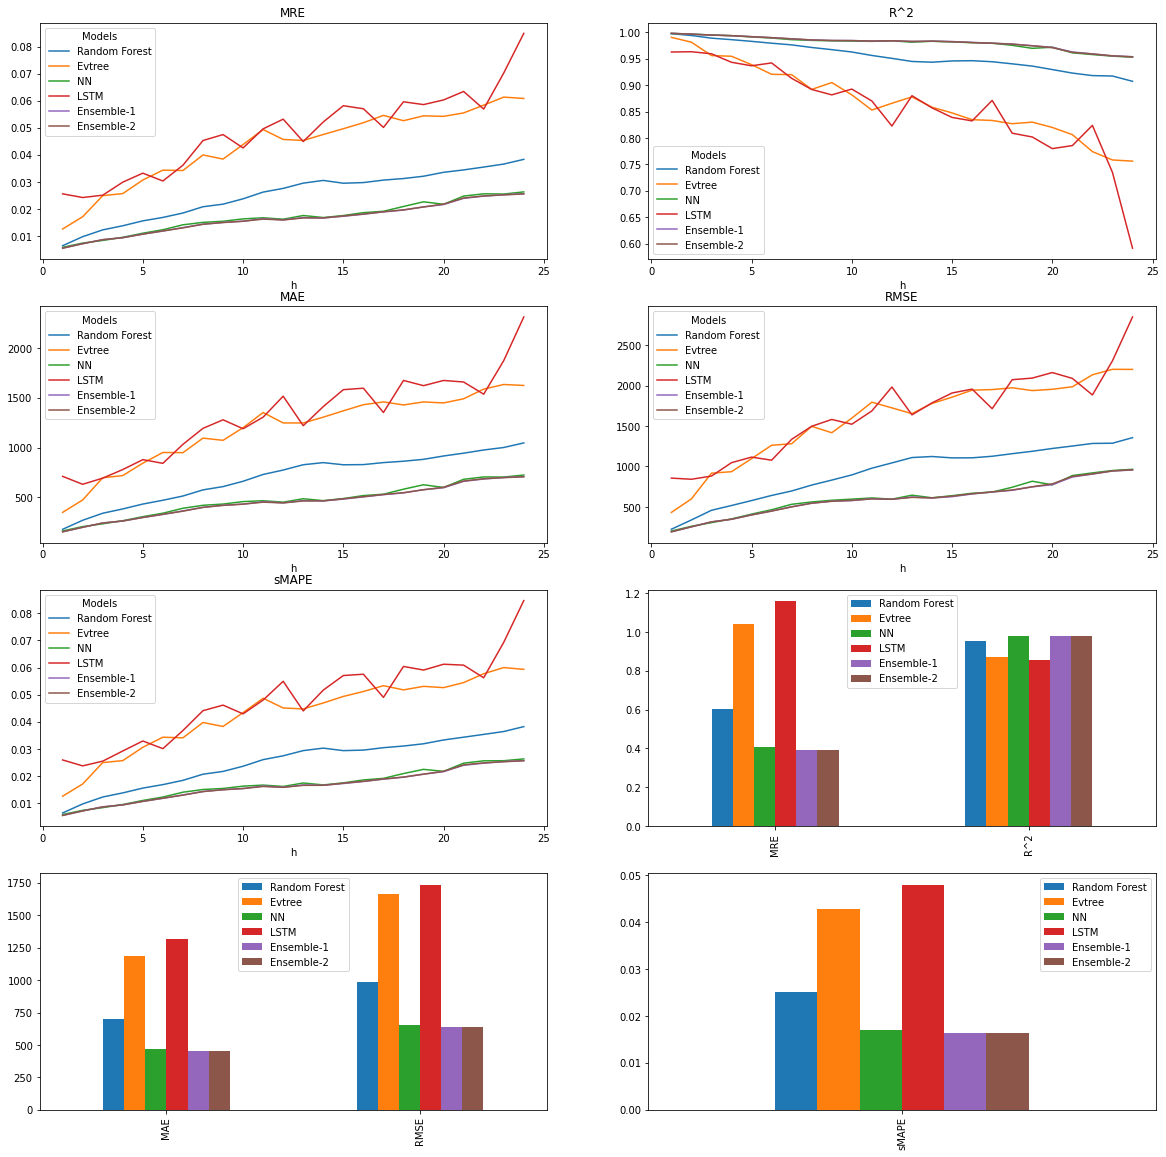

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4,2, figsize = (20,20))
fig.figure
for i,m in enumerate(measures):
    detailed[m].plot(title = m, ax = ax[i//2, i%2])
overall[['MRE', 'R^2']].T.plot.bar(ax = ax[2,1])
ax[2,1].legend(loc="upper center")
overall[['MAE', 'RMSE']].T.plot.bar(ax = ax[3,0])
ax[3,0].legend(loc="upper center")
overall[['sMAPE']].T.plot.bar(ax = ax[3,1])